# Exploratory analysis of Argentina's ADRs

In [22]:
%config InlineBackend.figure_format = "retina"

import os

import numpy as np
import pandas as pd
import warnings
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter("ignore")
register_matplotlib_converters()
sns.set(rc={'figure.figsize':(12,8)})

## Data munging

In [3]:
data_dir = 'data/'

In [31]:
tickers = [
    'BMA', 'BFR', 'CEPU', 'CRESY', 'EDN', 'GGAL', 'SUPV', 'IRS',
    'IRCP', 'LOMA', 'NTL', 'MELI', 'PAM', 'PZE', 'TEO', 'TS', 'TX',
    'TGS', 'YPF'
]

dfs = [pd.read_csv(os.path.join(data_dir, ticker.lower() + '.csv')) for ticker in tickers]

adrs_df = pd.concat(dfs, axis=0, ignore_index=False)
adrs_df.to_csv(os.path.join(data_dir, 'adrs.csv'), index=False)

Next we'll concatenate all options daily files into a csv.

In [10]:
dfs = []

for root, dirs, files in os.walk(data_dir):
    if root.endswith('daily'):
        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            dfs.append(df)
            
adr_options = pd.concat(dfs, axis=0)
adr_options.to_csv(os.path.join(data_dir, 'adr_options.csv'), index=False)

## Exploration

In [16]:
adrs_df = pd.read_csv(os.path.join(data_dir, 'adrs.csv'), index_col='date', parse_dates=['date'])
adrs_df.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2006-03-27 00:00:00+00:00,BMA,23.05,23.05,22.23,22.89,1065200,15.524521,15.524521,14.972239,15.416759,1065200,0.0,1.0
2006-03-28 00:00:00+00:00,BMA,22.38,22.47,21.90,22.47,1556100,15.073266,15.133883,14.749979,15.133883,1556100,0.0,1.0
2006-03-29 00:00:00+00:00,BMA,22.84,23.14,22.05,22.10,641300,15.383083,15.585138,14.851006,14.884682,641300,0.0,1.0
2006-03-30 00:00:00+00:00,BMA,22.75,23.10,22.70,23.00,293600,15.322467,15.558197,15.288791,15.490846,293600,0.0,1.0
2006-03-31 00:00:00+00:00,BMA,22.93,22.93,22.35,22.83,113600,15.443700,15.443700,15.053061,15.376348,113600,0.0,1.0


We'll begin plotting the close prices for each symbol.

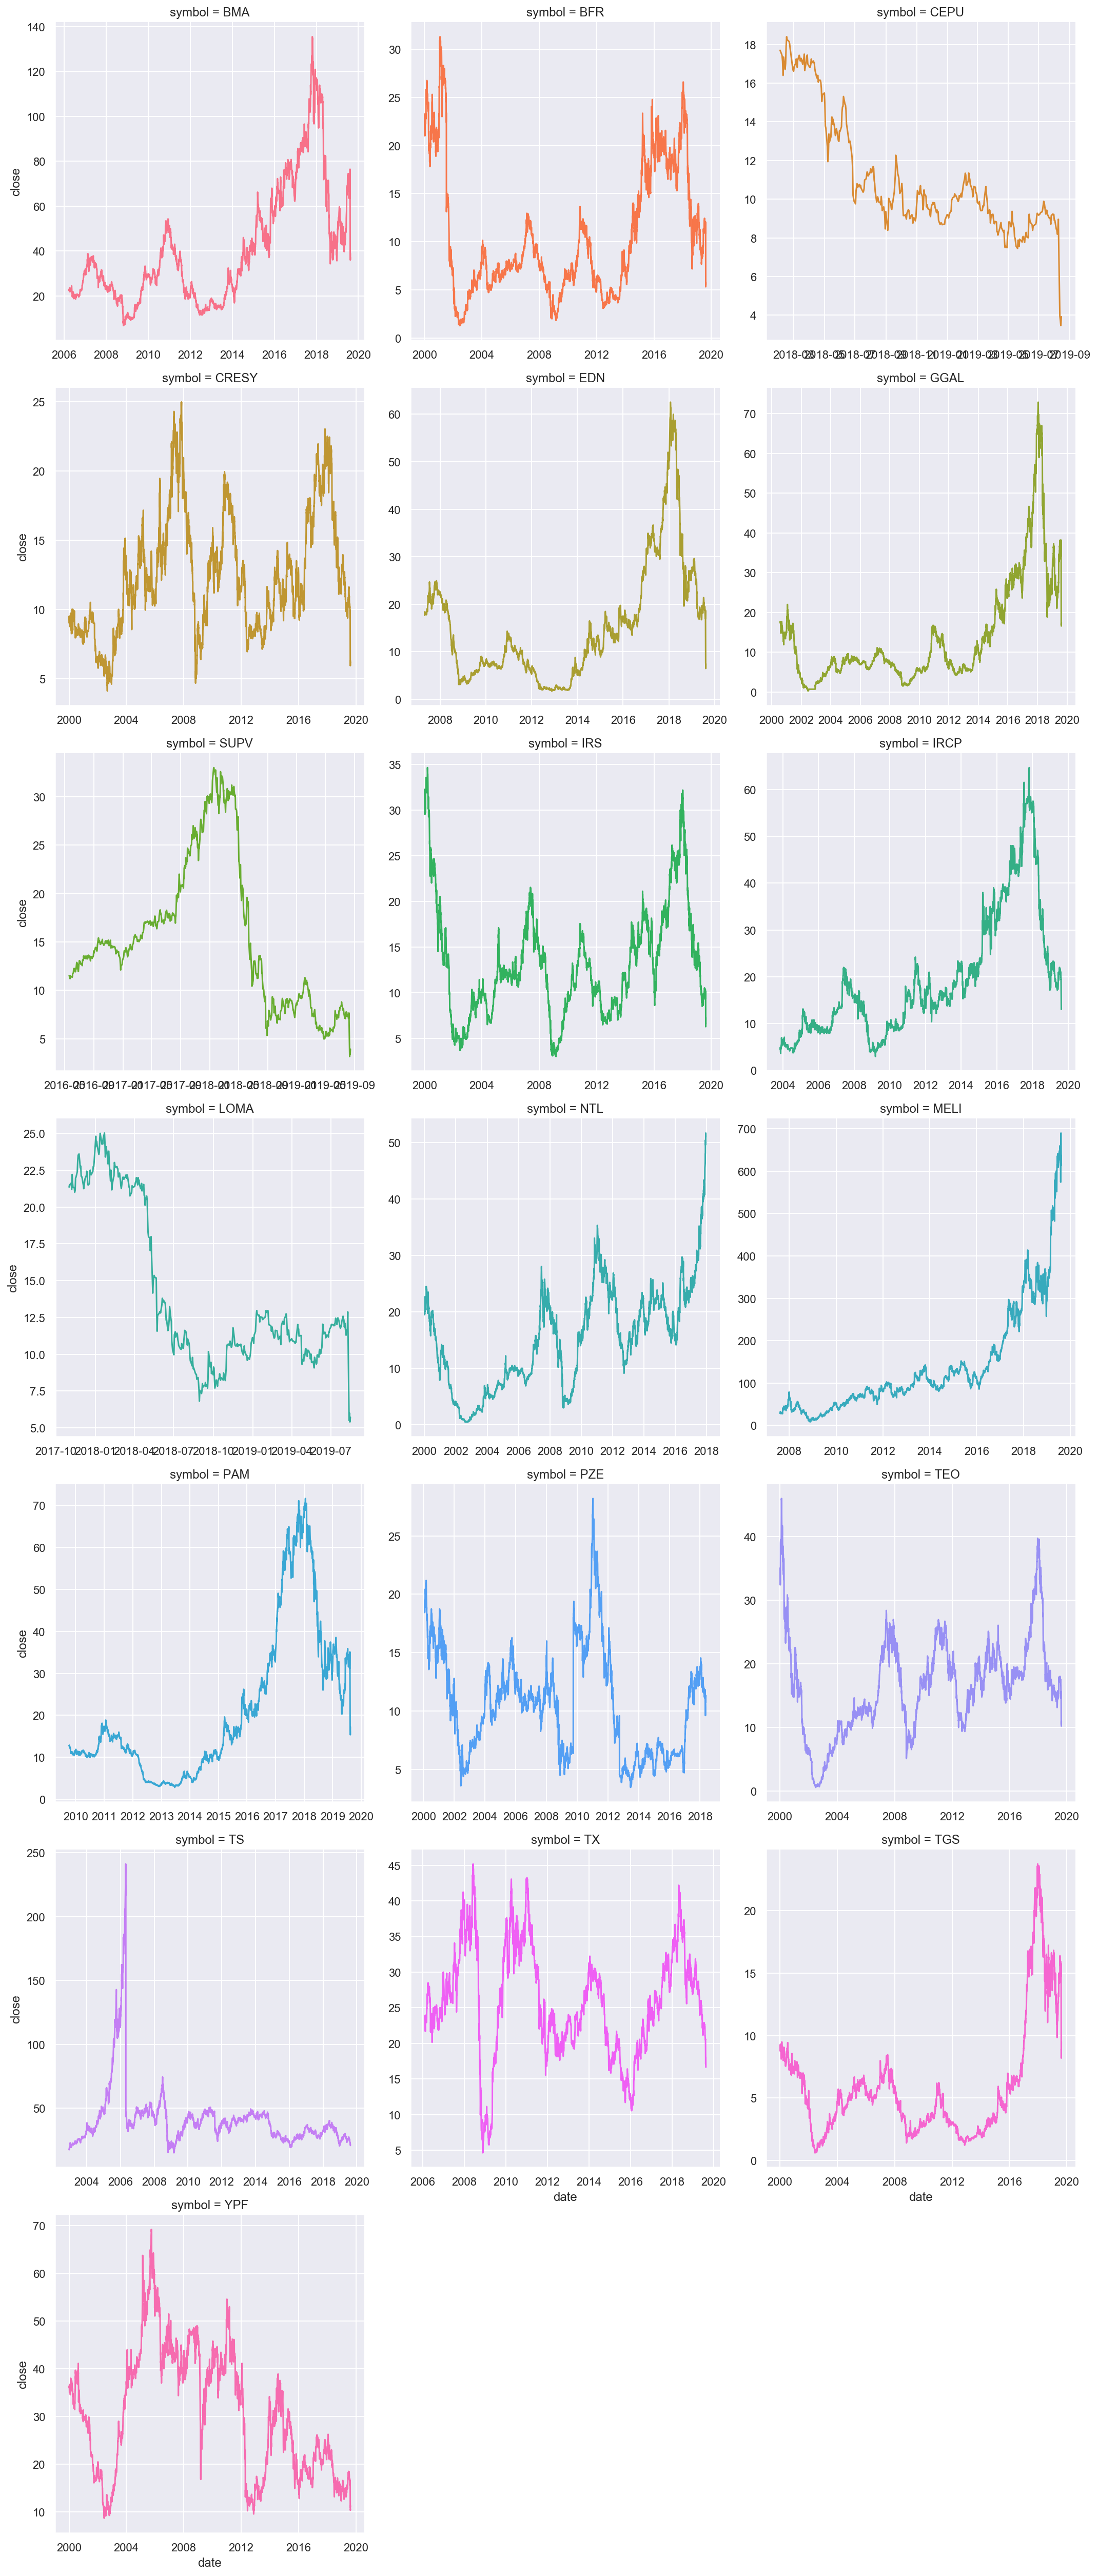

In [61]:
sns.relplot(x='date', y='close', col='symbol', hue='symbol',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=False,
            kind='line', data=adrs_df.reset_index());

In [28]:
adrs_df.groupby('symbol')['close'].describe()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
BFR,4936.0,10.605124,6.640204,1.290,5.840,8.0450,14.7575,31.30
BMA,3371.0,40.657659,26.123050,6.830,20.930,32.2000,52.7700,135.46
CEPU,386.0,11.061062,3.035634,3.460,9.060,9.9750,12.2775,18.40
CRESY,4936.0,12.419762,4.296442,4.100,9.020,11.7055,15.0000,24.95
EDN,3099.0,15.310731,12.471194,1.710,6.330,12.1100,20.2450,62.55
GGAL,4795.0,13.896774,13.419612,0.220,5.580,8.2500,17.0150,72.88
IRCP,3971.0,19.571763,13.359246,2.985,9.350,15.9999,22.9700,64.65
IRS,4936.0,13.227096,6.103691,3.010,8.900,12.2850,16.4025,34.63
LOMA,449.0,14.069621,5.356757,5.400,10.340,11.7400,21.1200,25.02


### Daily returns

Next we'll calculate daily returns.

In [17]:
adrs_df['returns'] = adrs_df.groupby('symbol')['close'].pct_change() * 100

In [18]:
adrs_df.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,returns
date,,,,,,,,,,,,,,
2006-03-27 00:00:00+00:00,BMA,23.05,23.05,22.23,22.89,1065200,15.524521,15.524521,14.972239,15.416759,1065200,0.0,1.0,NaN
2006-03-28 00:00:00+00:00,BMA,22.38,22.47,21.90,22.47,1556100,15.073266,15.133883,14.749979,15.133883,1556100,0.0,1.0,-2.906725
2006-03-29 00:00:00+00:00,BMA,22.84,23.14,22.05,22.10,641300,15.383083,15.585138,14.851006,14.884682,641300,0.0,1.0,2.055407
2006-03-30 00:00:00+00:00,BMA,22.75,23.10,22.70,23.00,293600,15.322467,15.558197,15.288791,15.490846,293600,0.0,1.0,-0.394046
2006-03-31 00:00:00+00:00,BMA,22.93,22.93,22.35,22.83,113600,15.443700,15.443700,15.053061,15.376348,113600,0.0,1.0,0.791209


In [30]:
adrs_df.groupby('symbol')['returns'].describe()

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
BFR,4935.0,0.041134,3.674591,-55.850622,-1.748786,0.000000,1.680880,46.760563
BMA,3370.0,0.071743,3.285291,-52.667364,-1.513835,0.000000,1.638795,27.008149
CEPU,385.0,-0.271721,4.314501,-55.915179,-1.913876,-0.317460,1.581028,16.880093
CRESY,4935.0,0.030291,2.765595,-38.090452,-1.257072,0.000000,1.179014,27.118644
EDN,3098.0,0.051126,3.888776,-58.983957,-1.690714,-0.031217,1.629187,27.551020
GGAL,4794.0,0.093428,4.626758,-56.117370,-1.626710,0.000000,1.693722,153.623188
IRCP,3970.0,0.116098,4.223714,-32.424983,-0.712043,0.000000,0.816572,36.986301
IRS,4935.0,0.006140,2.678878,-38.287402,-1.255066,0.000000,1.205858,18.083573
LOMA,448.0,-0.166143,4.533969,-57.298137,-1.875441,-0.087351,1.505056,22.650602


Let's plot a histogram of the daily returns for each symbol.

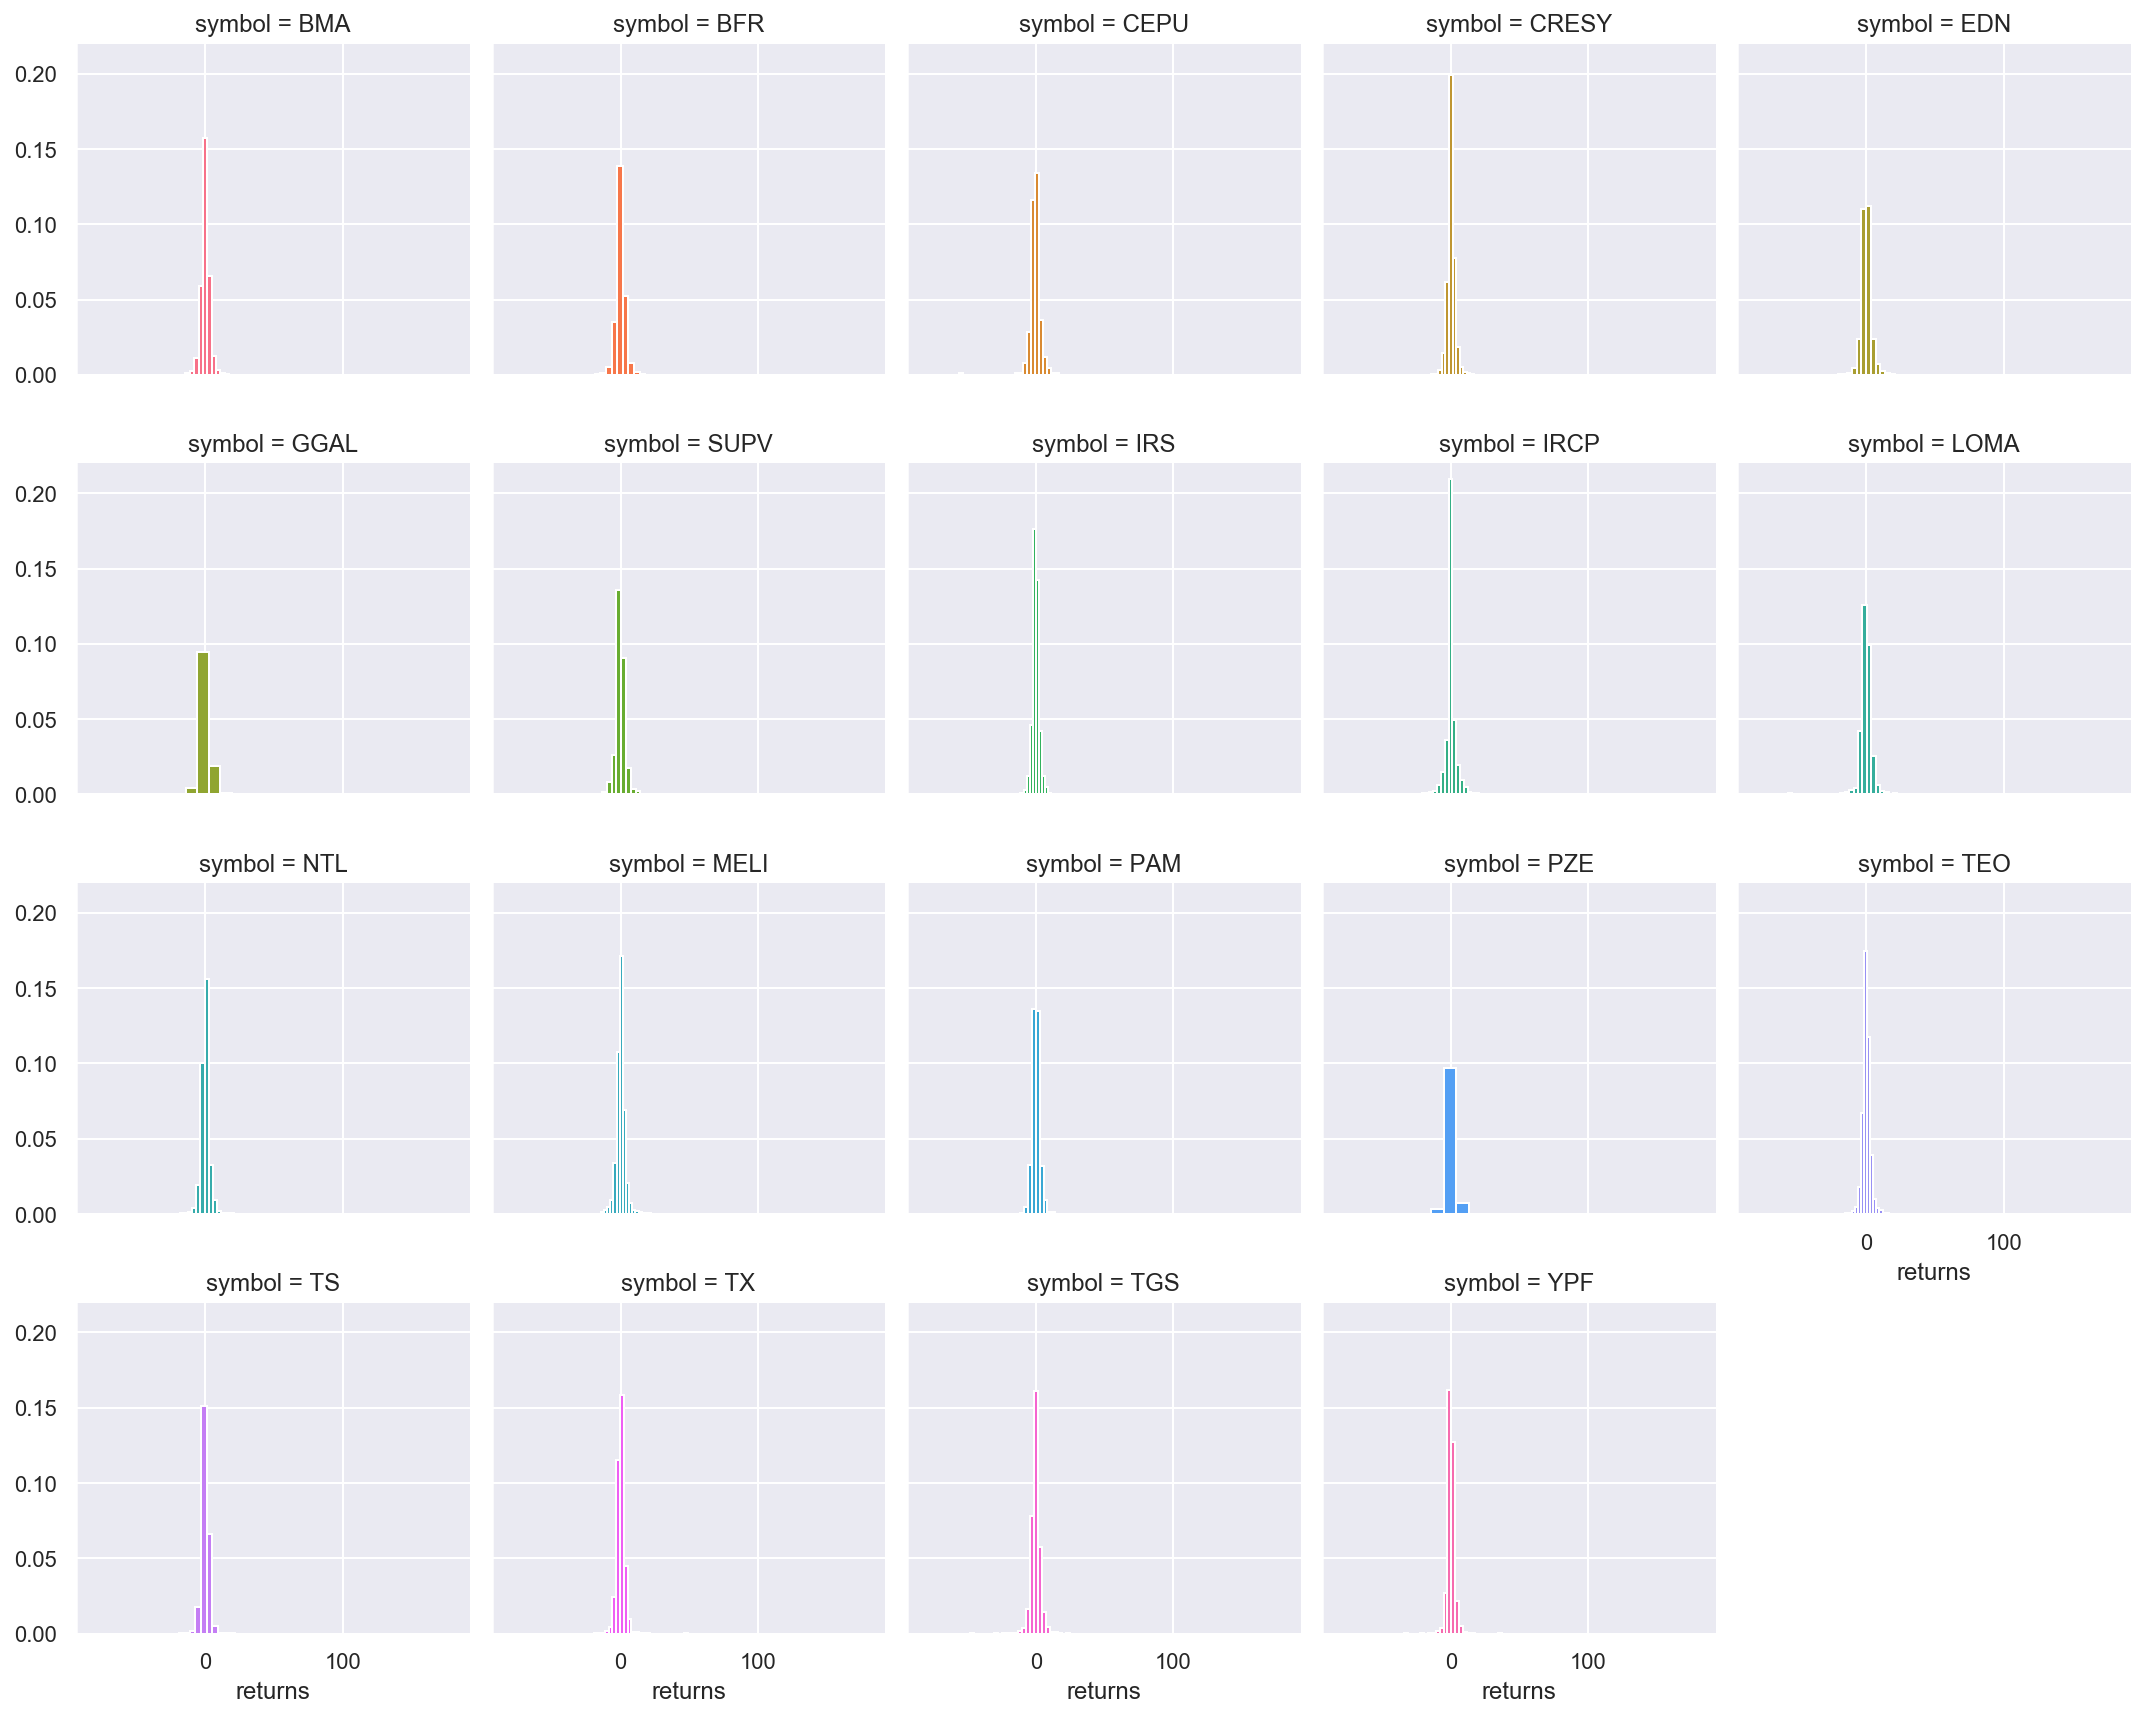

In [15]:
g = sns.FacetGrid(adrs_df, col='symbol', col_wrap=5, hue='symbol')
g.map(plt.hist, 'returns', bins=25, density=True)

Now if we remove outliers, say discard days where return was higher than 10% or lower than -10%:

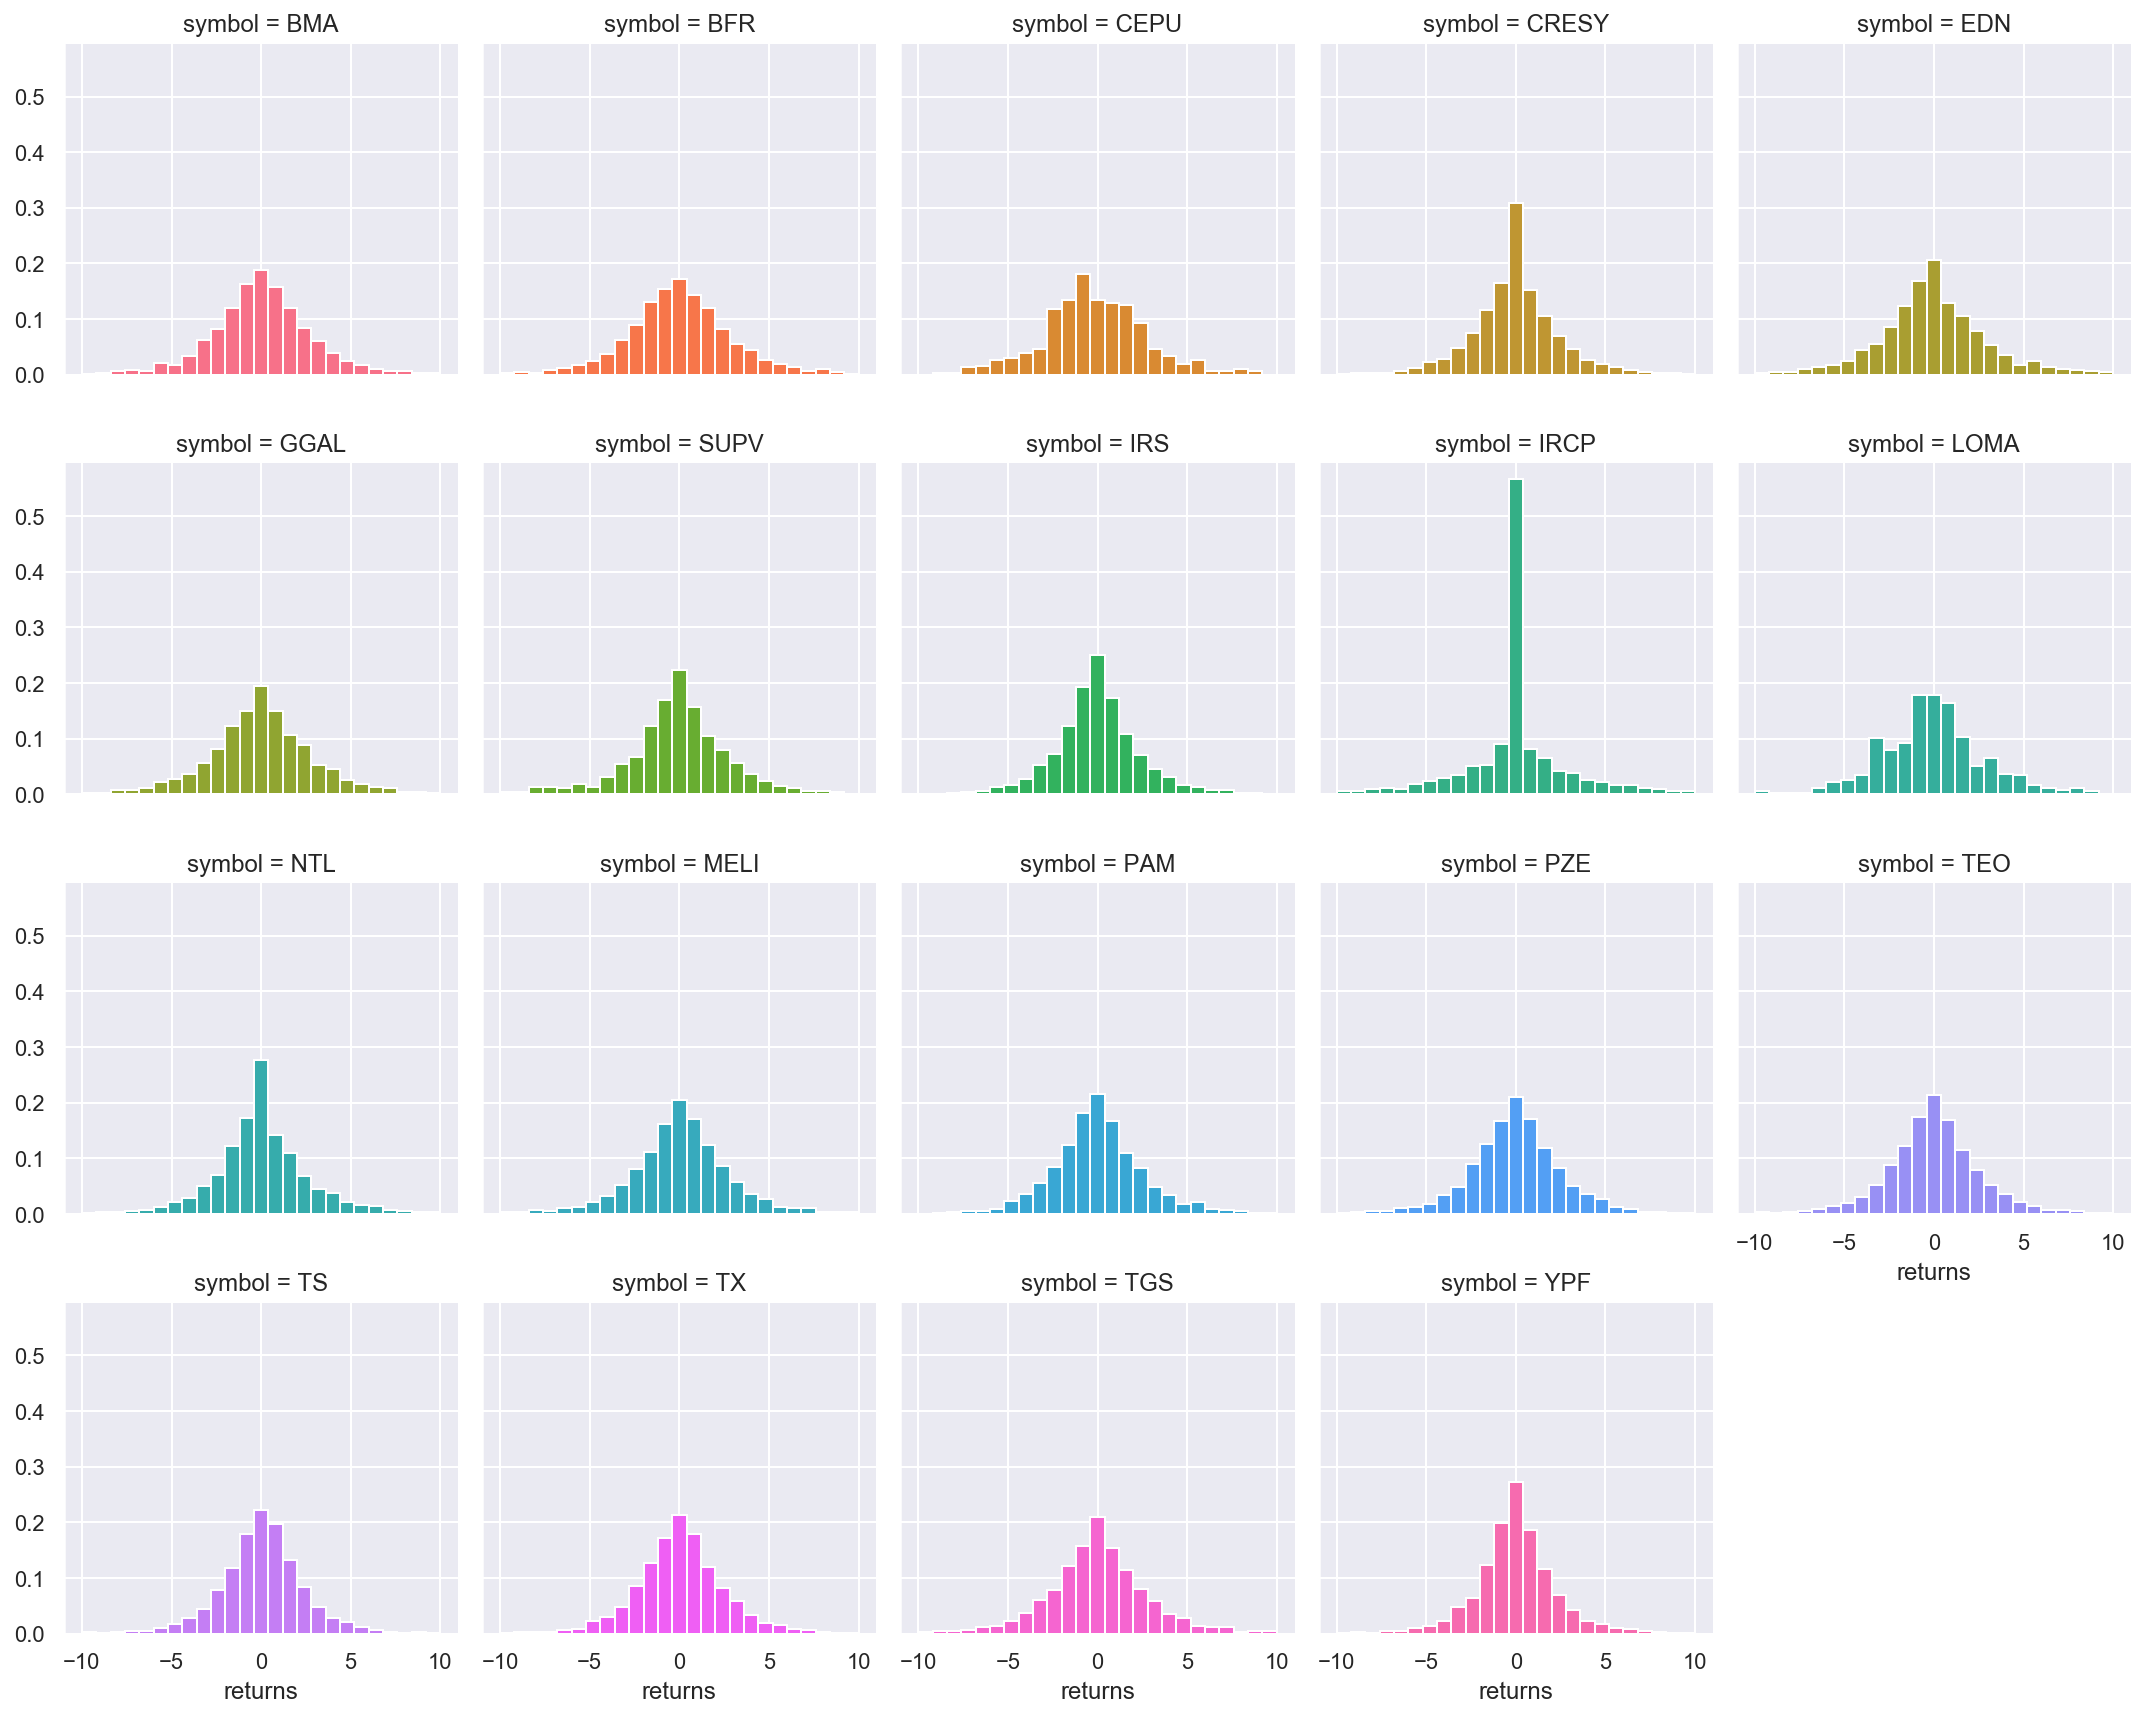

In [17]:
g = sns.FacetGrid(adrs_df, col='symbol', col_wrap=5, hue='symbol')
g.map(plt.hist, 'returns', bins=25, density=True, range=(-10,10))

Lets plot the mean returns.

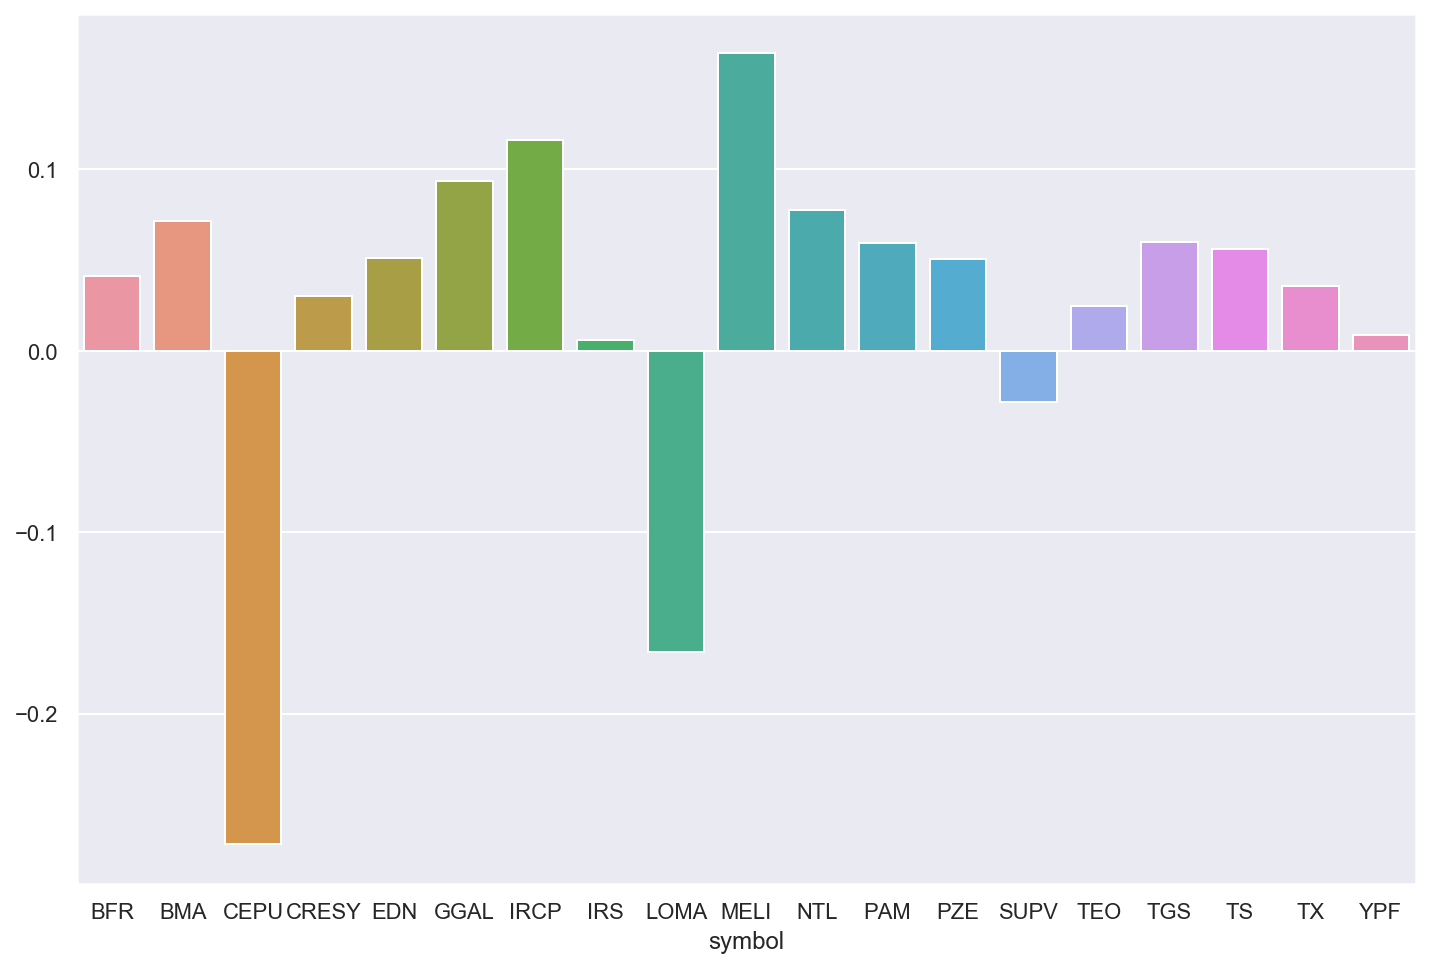

In [31]:
mean_rets = adrs_df.groupby('symbol')['returns'].mean()
sns.barplot(x=mean_rets.index, y=mean_rets.values);

Next we'll look at the cumulative log returns over time.

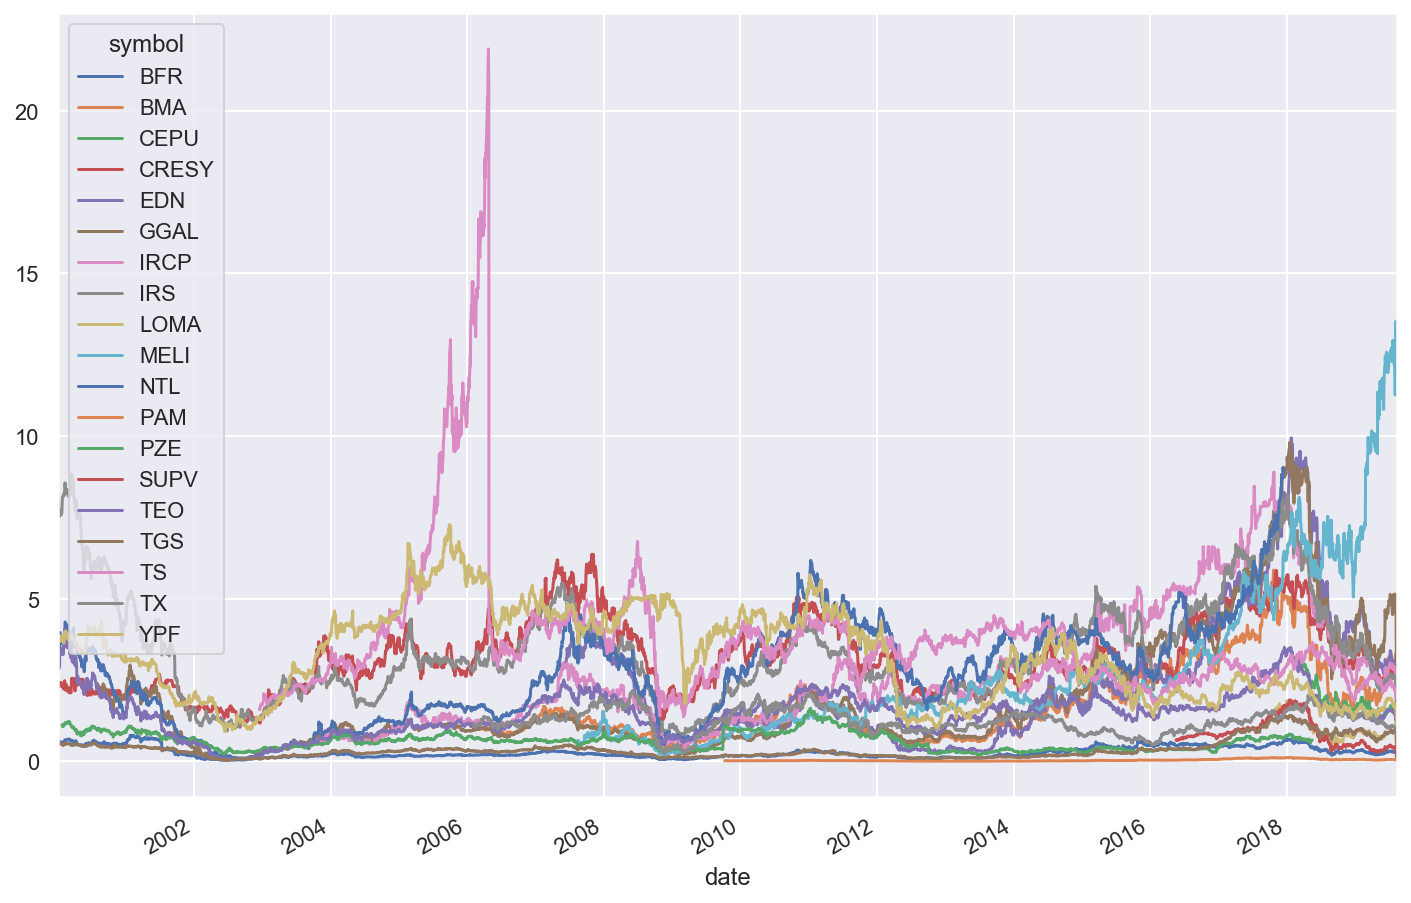

In [36]:
adrs_df['log_returns'] = np.log(adrs_df['close'] / adrs_df['close'].shift(1))

pivoted = adrs_df.pivot(columns='symbol', values='log_returns')
pivoted.cumsum().apply(np.exp).plot();

### Volatility smiles

Now we'll examine the options end-of-day data for the ADRs.

In [13]:
adr_options = pd.read_csv(os.path.join(data_dir, 'adr_options.csv'), index_col='quotedate', parse_dates=['quotedate', 'expiration'])
adr_options.head()

,underlying,underlying_last,exchange,optionroot,type,expiration,strike,last,net,bid,ask,volume,openinterest,impliedvol,delta,gamma
quotedate,,,,,,,,,,,,,,,,
2019-05-08,MELI,536.22,CBOE,MELI210115C00175000,call,2021-01-15,175.0,0.0,0.0,413.4,378.0,0,0,0.9327,0.9408,0.0002
2019-05-08,MELI,536.22,CBOE,MELI190621C00200000,call,2019-06-21,200.0,0.0,0.0,364.3,339.5,0,23,2.4888,0.9425,0.0002
2019-05-08,MELI,536.22,CBOE,MELI190621C00210000,call,2019-06-21,210.0,0.0,0.0,324.6,293.9,0,5,0.0200,0.0000,0.0000
2019-05-08,MELI,536.22,CBOE,MELI190621C00220000,call,2019-06-21,220.0,0.0,0.0,314.8,276.1,0,11,0.0200,0.0000,0.0000
2019-05-08,MELI,536.22,CBOE,MELI190621C00230000,call,2019-06-21,230.0,0.0,0.0,304.7,309.5,0,1,1.4504,0.9737,0.0002


Let's plot the [volatility smile](https://www.investopedia.com/terms/v/volatilitysmile.asp) for each symbol at 2019-08-09

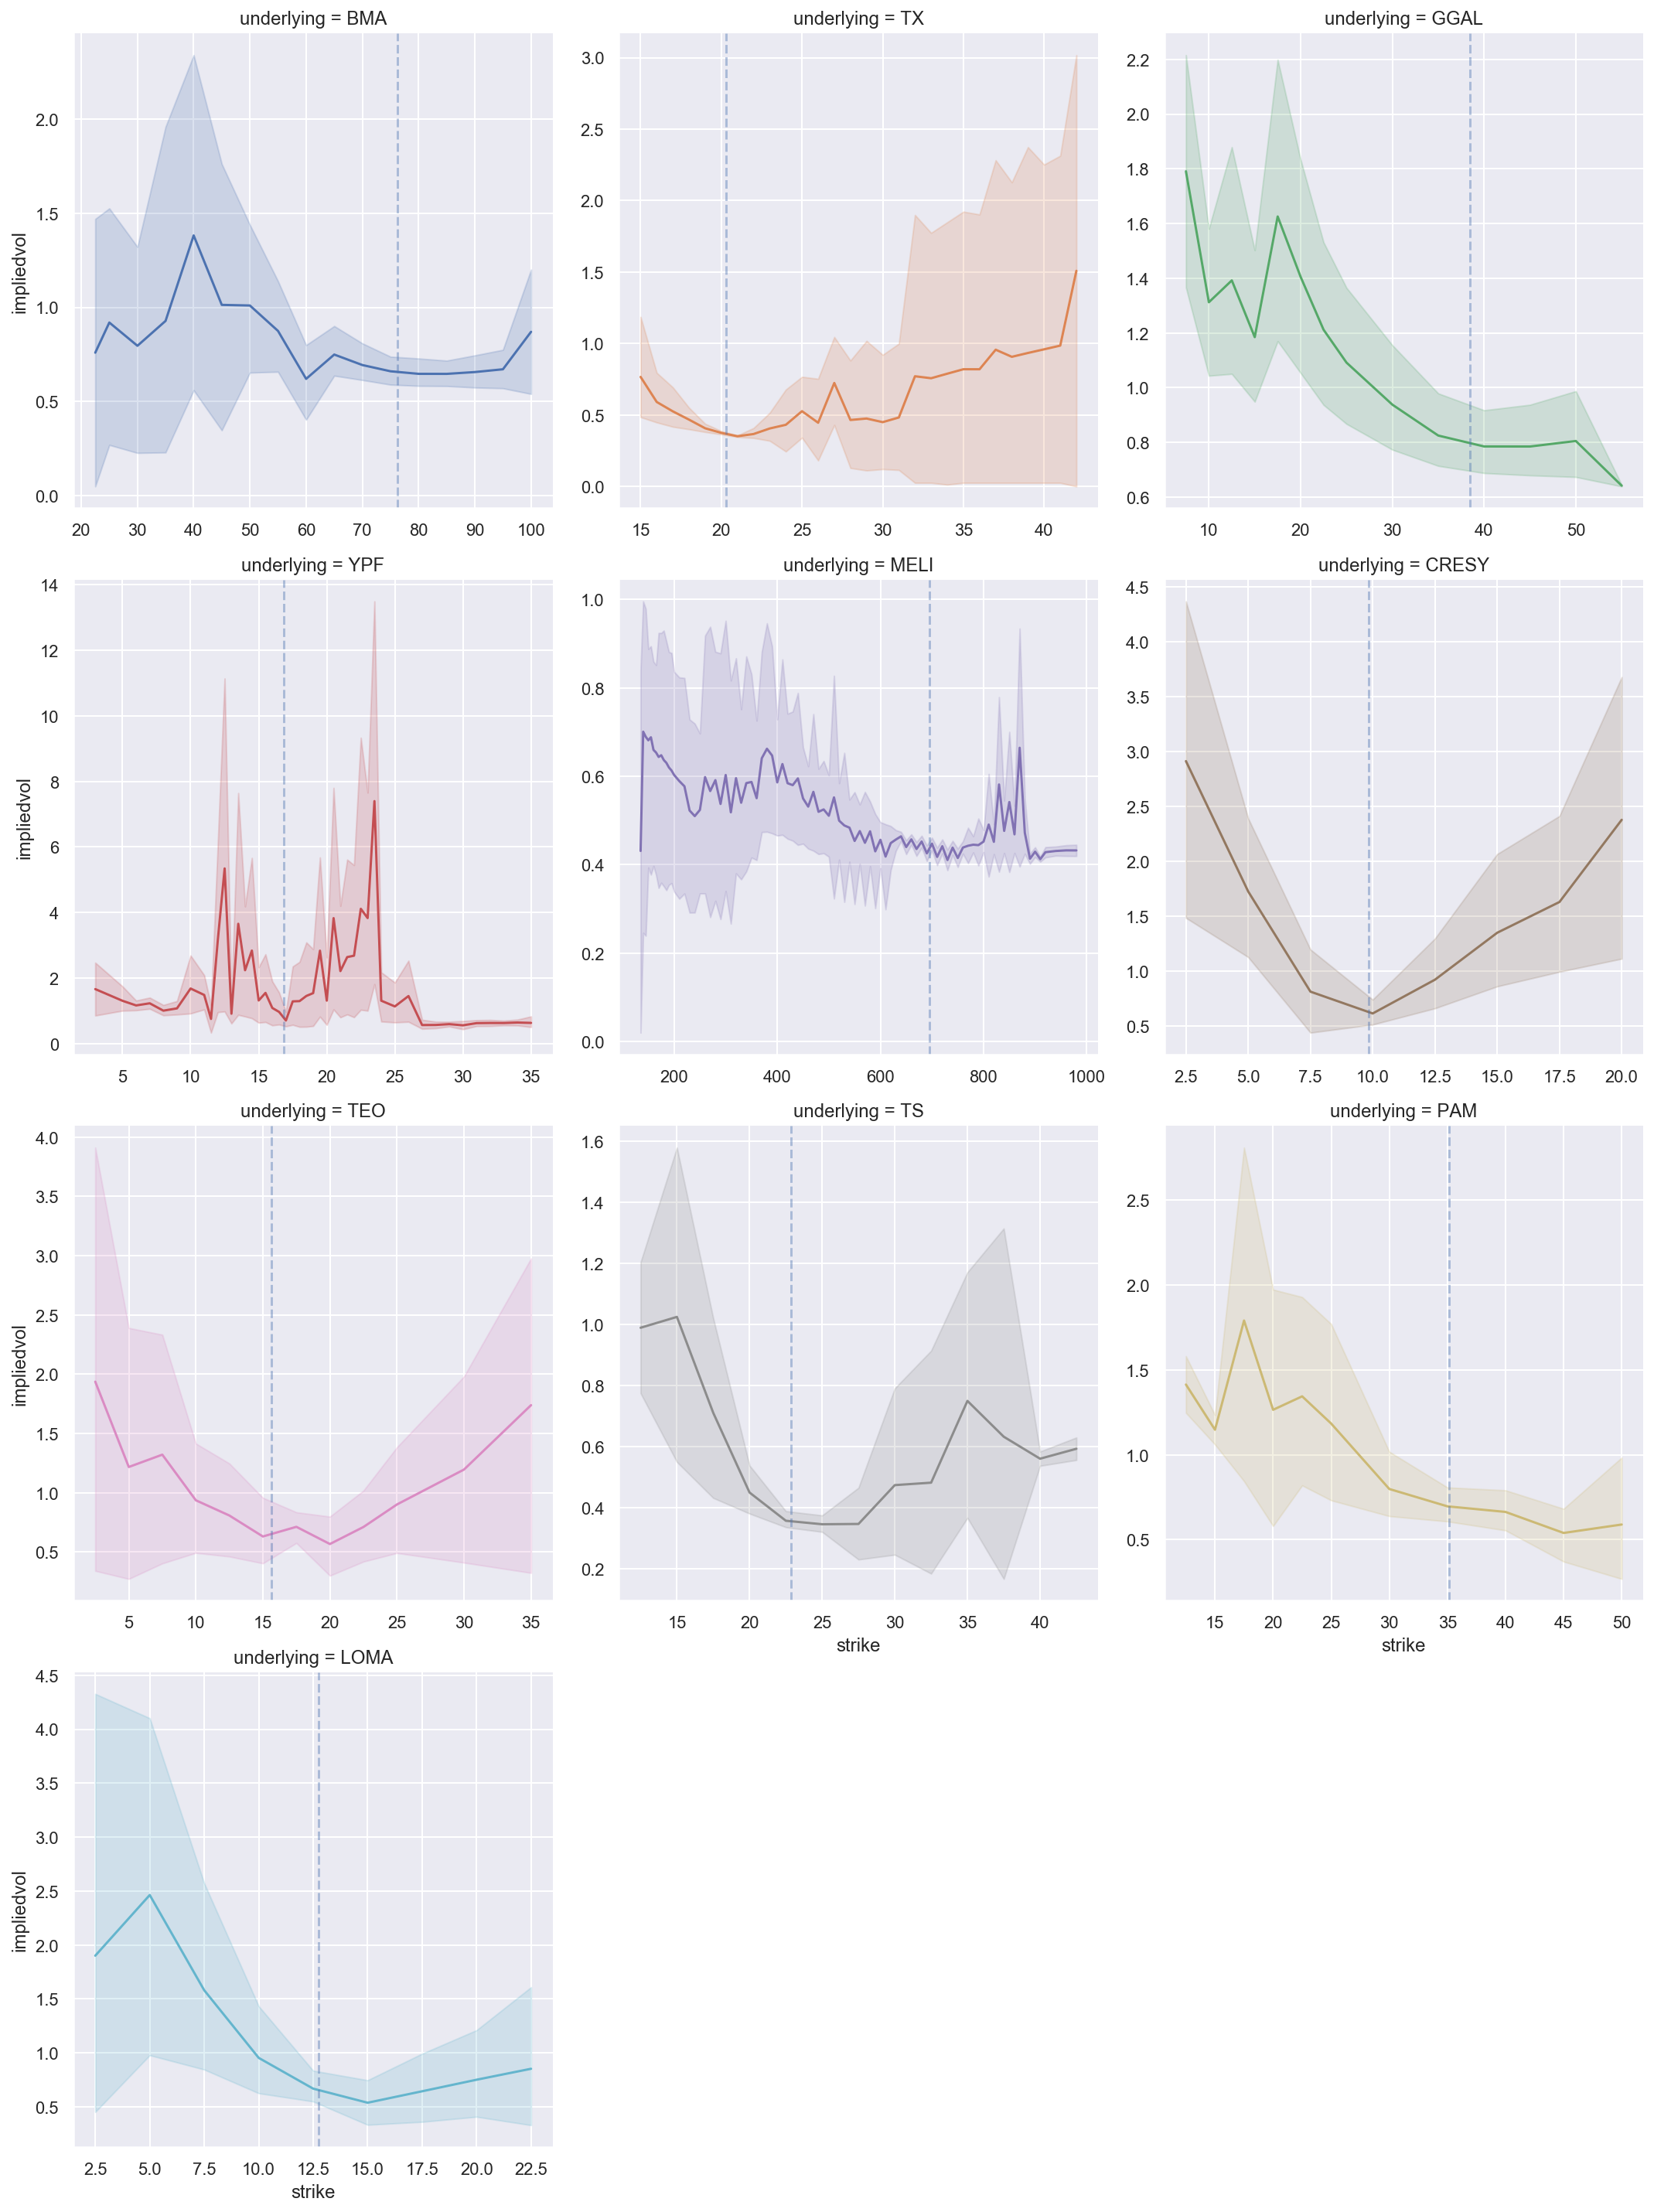

In [55]:
friday_9th = adr_options.loc['2019-08-9']
g = sns.relplot(x='strike', y='impliedvol', col='underlying', hue='underlying',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=False,
            kind='line', data=friday_9th)

for ax, symbol in zip(g.axes, g.col_names):
    spot_price = friday_9th.loc[friday_9th['underlying'] == symbol, 'underlying_last'].iloc[0]
    ax.axvline(spot_price, alpha=0.4, linestyle='--')

Now lets try the the same plot for the following Monday (2019-08-12)

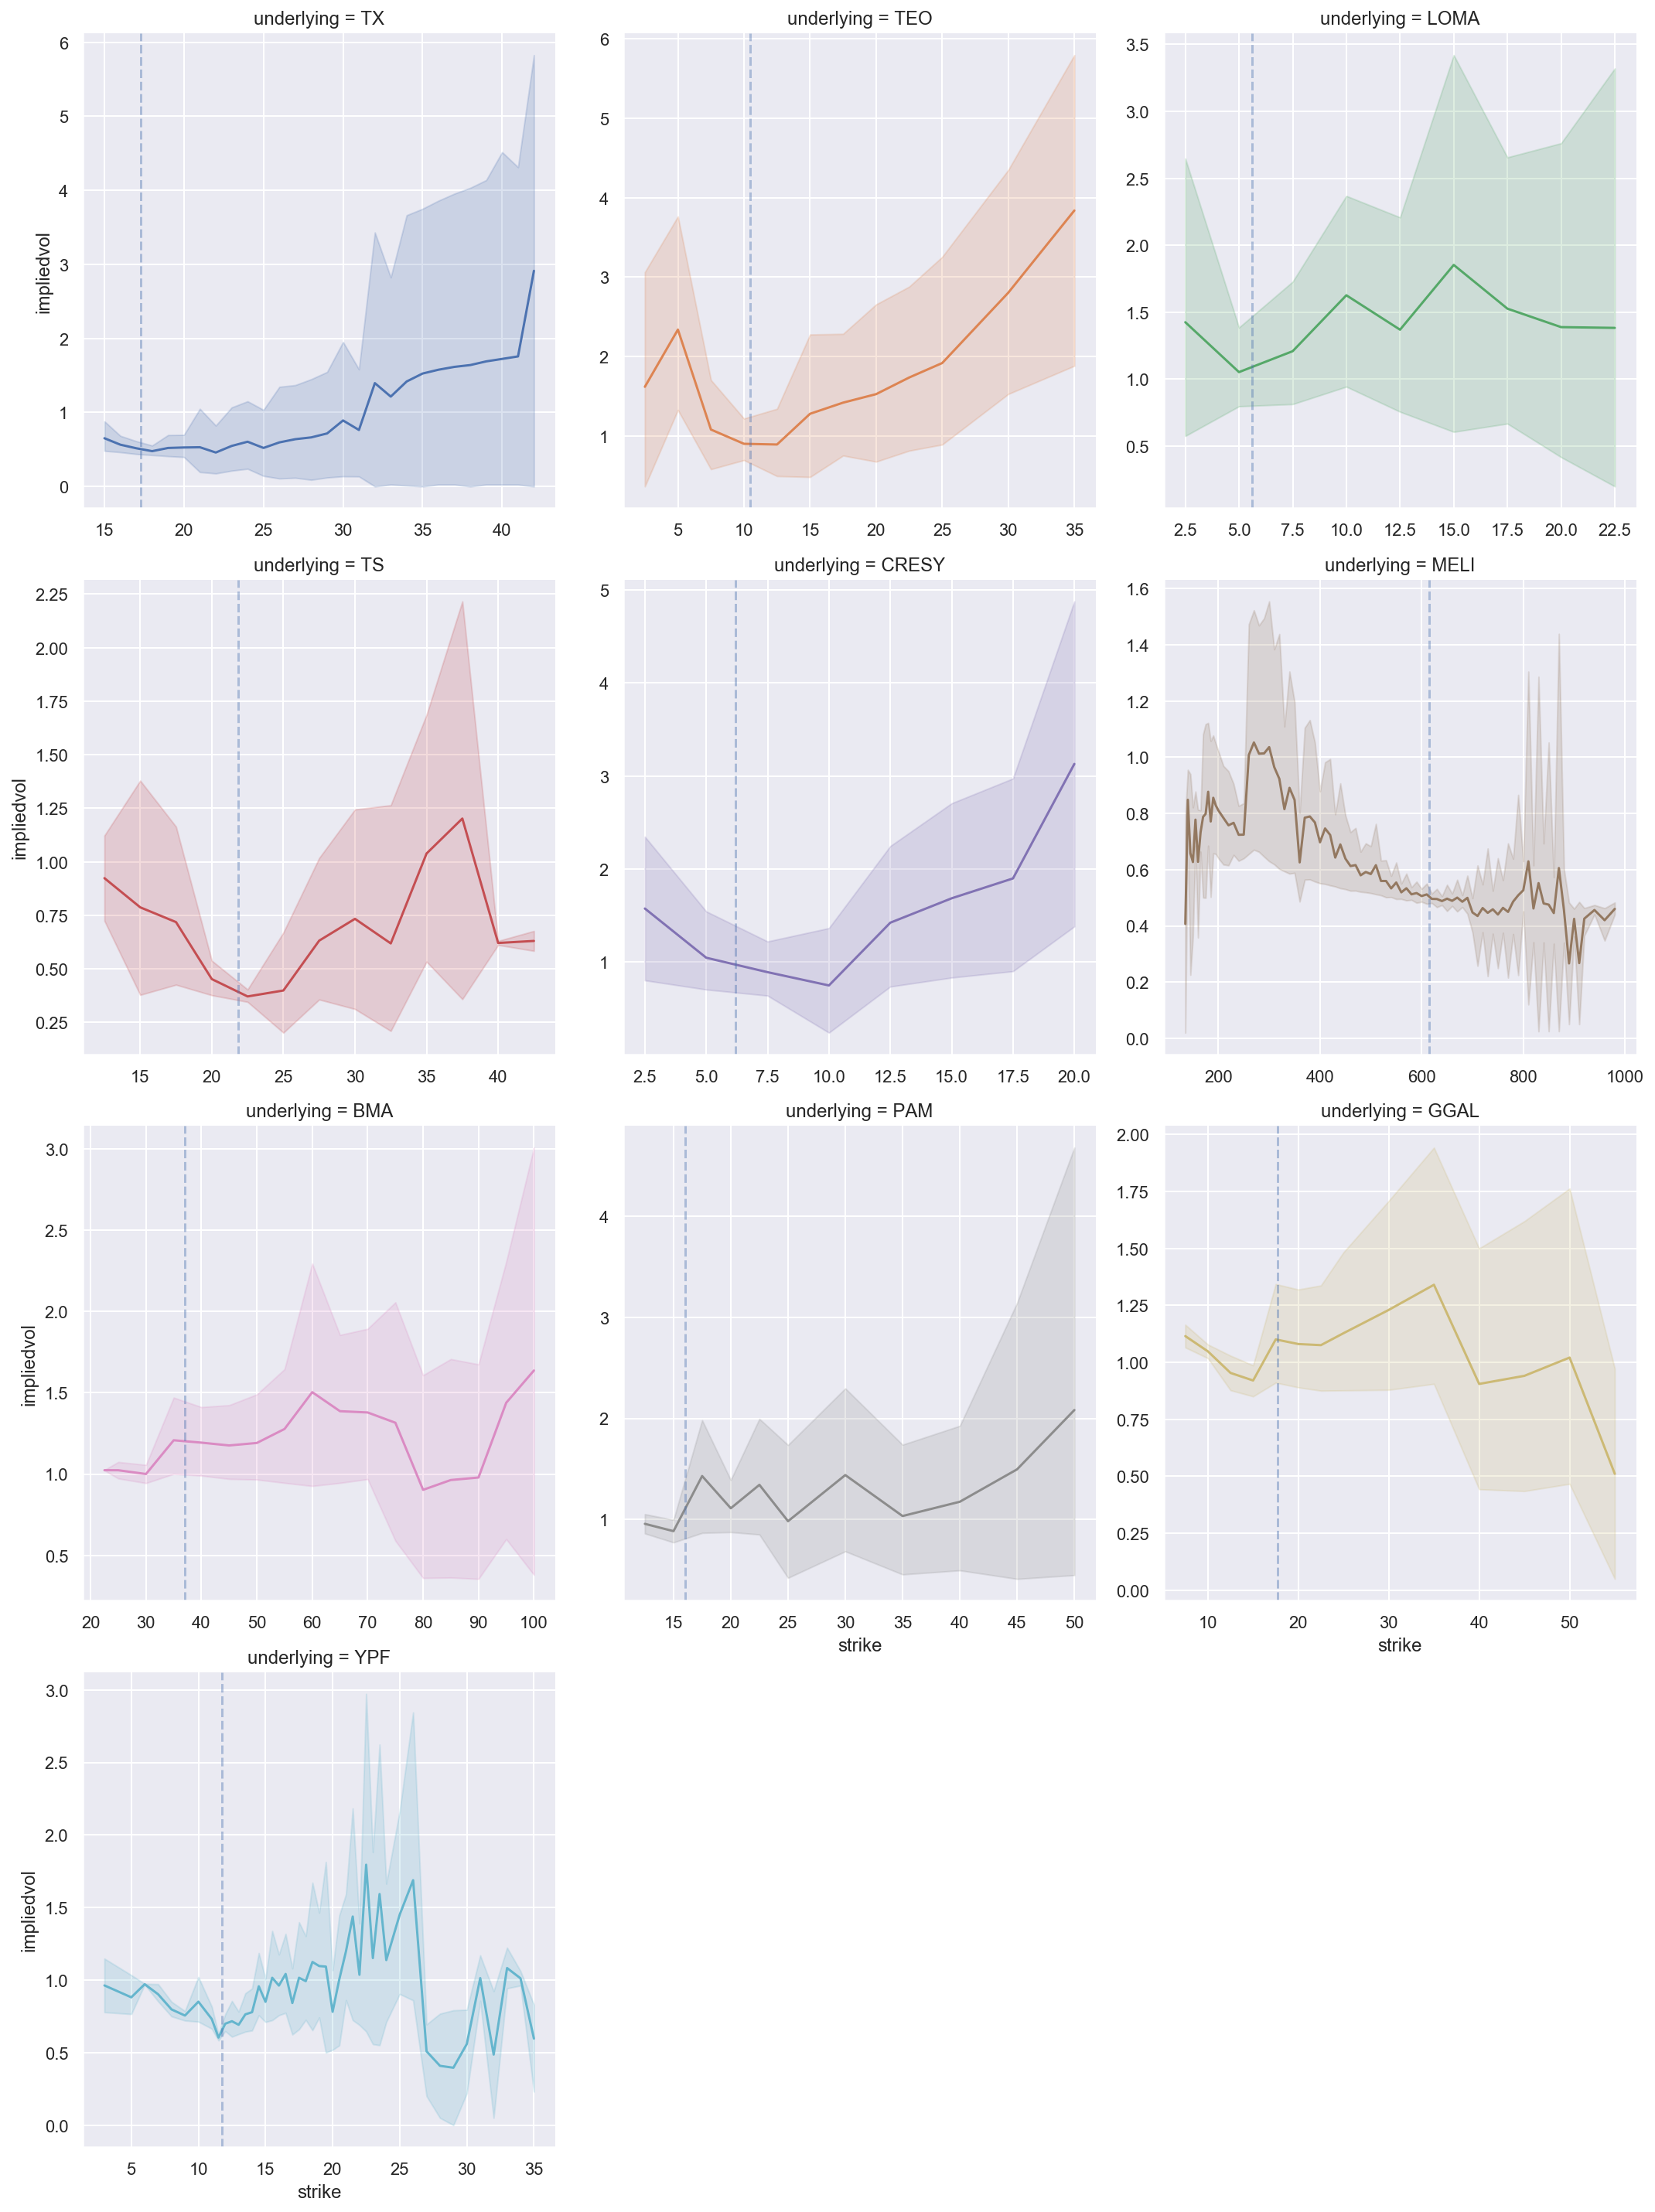

In [52]:
black_monday = adr_options.loc['2019-08-12']
g = sns.relplot(x='strike', y='impliedvol', col='underlying', hue='underlying',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=False,
            kind='line', data=black_monday)

for ax, symbol in zip(g.axes, g.col_names):
    spot_price = black_monday.loc[black_monday['underlying'] == symbol, 'underlying_last'].iloc[0]
    ax.axvline(spot_price, alpha=0.4, linestyle='--')